In [1]:
import sys
import os
from  torch.utils.data import DataLoader
import datetime
sys.path.append('/home/falcon/Desktop/T2P/src/utils')

from utils.plotting_utils import Plot
from utils.plotting_utils import plot_line
from utils.color import ColorPalette
from module.model import T2P
from utils.data import TimeSeriesDataset
from train import train

# T2P

T2P (time-to-pattern) is an interpretable neural network designed to identify informative patterns in time series data. 

This neural network requires several training parameters to be specified, including the window size, which determines the length of the patterns to be learned from a continuous time series data, if they are not already in a specific size. 

The n_patterns parameter specifies the number of patterns the user would like to identify in the data.

T2P also includes several hyperparameters that need to be specified for training: lambda_1, which should be chosen between 0.6-0.9, and lambda_2, which should be chosen between 0.2-0.5.

The location of BinConcrete distribution, referred to as "a", should be set between 0.6-0.8.

Additionally, a learning rate should be specified, ideally between 1e-4 and 1e-3. 

The device parameter specifies the model's training device, which can be set to "cuda" or "cpu". 

Finally, the number of epochs the model needs to learn the pattern should also be specified.

For more detailed information on the T2P neural network and its parameters, please refer to the associated paper

In [2]:
# parameters
window_size = 100
n_patterns = 4
lambda_1 = 0.83
lambda_2 = 0.21
a = 0.8
learning_rate = 1e-3
device = 'cpu'
epochs = 1000

# data file path
data_name='synthetic_80_noise.txt'
file_path = os.getcwd() + f'/data/{data_name}'

# directory to save the result if None the result would not be saved and only depict in the notebook
runId = datetime.datetime.now().isoformat().replace(':', '_')
dn = data_name.split('.')[0]
save_dir = f'{os.getcwd()}/experiments/{dn}/{runId}/'
if save_dir is not None and not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [3]:
t2p = T2P(timesteps=window_size, n_patterns=n_patterns, lambda_1=lambda_1, device=device)

In [4]:
dataset = TimeSeriesDataset(file_path, window_size, device)

In [5]:
dataloader = DataLoader(dataset, batch_size=3, shuffle=True)

In [6]:
loss, sparsity = train(
                        epochs,
                        t2p,
                        dataloader,
                        learning_rate,
                        a,
                        lambda_1,
                        lambda_2,
                        device
                     )

##########Start trining##########
Epoch: 000000 | ELBO: 2.078 | Sparsity: 0.011
Epoch: 000001 | ELBO: 2.062 | Sparsity: 0.015
Epoch: 000002 | ELBO: 2.031 | Sparsity: 0.010
Epoch: 000003 | ELBO: 2.038 | Sparsity: 0.010


/home/falcon/anaconda3/envs/torch9/lib/python3.7/site-packages/torch/nn/functional.py:652: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448224956/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool1d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 000004 | ELBO: 2.022 | Sparsity: 0.012
Epoch: 000005 | ELBO: 2.008 | Sparsity: 0.013
Epoch: 000006 | ELBO: 2.010 | Sparsity: 0.010
Epoch: 000007 | ELBO: 2.009 | Sparsity: 0.010
Epoch: 000008 | ELBO: 1.988 | Sparsity: 0.010
Epoch: 000009 | ELBO: 1.979 | Sparsity: 0.010
Epoch: 000010 | ELBO: 1.992 | Sparsity: 0.011
Epoch: 000011 | ELBO: 1.967 | Sparsity: 0.012
Epoch: 000012 | ELBO: 1.964 | Sparsity: 0.013
Epoch: 000013 | ELBO: 1.955 | Sparsity: 0.011
Epoch: 000014 | ELBO: 1.973 | Sparsity: 0.014
Epoch: 000015 | ELBO: 1.957 | Sparsity: 0.013
Epoch: 000016 | ELBO: 1.943 | Sparsity: 0.013
Epoch: 000017 | ELBO: 1.953 | Sparsity: 0.013
Epoch: 000018 | ELBO: 1.941 | Sparsity: 0.014
Epoch: 000019 | ELBO: 1.933 | Sparsity: 0.014
Epoch: 000020 | ELBO: 1.936 | Sparsity: 0.017
Epoch: 000021 | ELBO: 1.949 | Sparsity: 0.019
Epoch: 000022 | ELBO: 1.941 | Sparsity: 0.018
Epoch: 000023 | ELBO: 1.939 | Sparsity: 0.029
Epoch: 000024 | ELBO: 1.933 | Sparsity: 0.020
Epoch: 000025 | ELBO: 1.919 | Spar

Epoch: 000188 | ELBO: 1.472 | Sparsity: 0.660
Epoch: 000189 | ELBO: 1.463 | Sparsity: 0.649
Epoch: 000190 | ELBO: 1.473 | Sparsity: 0.662
Epoch: 000191 | ELBO: 1.465 | Sparsity: 0.662
Epoch: 000192 | ELBO: 1.468 | Sparsity: 0.655
Epoch: 000193 | ELBO: 1.460 | Sparsity: 0.615
Epoch: 000194 | ELBO: 1.464 | Sparsity: 0.639
Epoch: 000195 | ELBO: 1.460 | Sparsity: 0.630
Epoch: 000196 | ELBO: 1.452 | Sparsity: 0.633
Epoch: 000197 | ELBO: 1.471 | Sparsity: 0.640
Epoch: 000198 | ELBO: 1.460 | Sparsity: 0.669
Epoch: 000199 | ELBO: 1.455 | Sparsity: 0.621
Epoch: 000200 | ELBO: 1.466 | Sparsity: 0.647
Epoch: 000201 | ELBO: 1.471 | Sparsity: 0.631
Epoch: 000202 | ELBO: 1.505 | Sparsity: 0.617
Epoch: 000203 | ELBO: 1.451 | Sparsity: 0.639
Epoch: 000204 | ELBO: 1.458 | Sparsity: 0.643
Epoch: 000205 | ELBO: 1.448 | Sparsity: 0.653
Epoch: 000206 | ELBO: 1.442 | Sparsity: 0.629
Epoch: 000207 | ELBO: 1.449 | Sparsity: 0.633
Epoch: 000208 | ELBO: 1.449 | Sparsity: 0.630
Epoch: 000209 | ELBO: 1.446 | Spar

Epoch: 000371 | ELBO: 1.384 | Sparsity: 0.628
Epoch: 000372 | ELBO: 1.379 | Sparsity: 0.640
Epoch: 000373 | ELBO: 1.386 | Sparsity: 0.619
Epoch: 000374 | ELBO: 1.386 | Sparsity: 0.597
Epoch: 000375 | ELBO: 1.386 | Sparsity: 0.624
Epoch: 000376 | ELBO: 1.392 | Sparsity: 0.624
Epoch: 000377 | ELBO: 1.381 | Sparsity: 0.620
Epoch: 000378 | ELBO: 1.394 | Sparsity: 0.611
Epoch: 000379 | ELBO: 1.384 | Sparsity: 0.622
Epoch: 000380 | ELBO: 1.378 | Sparsity: 0.639
Epoch: 000381 | ELBO: 1.435 | Sparsity: 0.611
Epoch: 000382 | ELBO: 1.404 | Sparsity: 0.613
Epoch: 000383 | ELBO: 1.390 | Sparsity: 0.635
Epoch: 000384 | ELBO: 1.425 | Sparsity: 0.593
Epoch: 000385 | ELBO: 1.393 | Sparsity: 0.607
Epoch: 000386 | ELBO: 1.393 | Sparsity: 0.621
Epoch: 000387 | ELBO: 1.388 | Sparsity: 0.597
Epoch: 000388 | ELBO: 1.385 | Sparsity: 0.586
Epoch: 000389 | ELBO: 1.374 | Sparsity: 0.617
Epoch: 000390 | ELBO: 1.400 | Sparsity: 0.588
Epoch: 000391 | ELBO: 1.409 | Sparsity: 0.586
Epoch: 000392 | ELBO: 1.388 | Spar

Epoch: 000554 | ELBO: 1.394 | Sparsity: 0.590
Epoch: 000555 | ELBO: 1.383 | Sparsity: 0.554
Epoch: 000556 | ELBO: 1.380 | Sparsity: 0.627
Epoch: 000557 | ELBO: 1.414 | Sparsity: 0.600
Epoch: 000558 | ELBO: 1.398 | Sparsity: 0.633
Epoch: 000559 | ELBO: 1.384 | Sparsity: 0.623
Epoch: 000560 | ELBO: 1.401 | Sparsity: 0.539
Epoch: 000561 | ELBO: 1.390 | Sparsity: 0.573
Epoch: 000562 | ELBO: 1.389 | Sparsity: 0.627
Epoch: 000563 | ELBO: 1.377 | Sparsity: 0.626
Epoch: 000564 | ELBO: 1.378 | Sparsity: 0.629
Epoch: 000565 | ELBO: 1.380 | Sparsity: 0.625
Epoch: 000566 | ELBO: 1.391 | Sparsity: 0.617
Epoch: 000567 | ELBO: 1.388 | Sparsity: 0.606
Epoch: 000568 | ELBO: 1.386 | Sparsity: 0.580
Epoch: 000569 | ELBO: 1.381 | Sparsity: 0.576
Epoch: 000570 | ELBO: 1.379 | Sparsity: 0.626
Epoch: 000571 | ELBO: 1.378 | Sparsity: 0.641
Epoch: 000572 | ELBO: 1.372 | Sparsity: 0.624
Epoch: 000573 | ELBO: 1.373 | Sparsity: 0.621
Epoch: 000574 | ELBO: 1.372 | Sparsity: 0.626
Epoch: 000575 | ELBO: 1.384 | Spar

Epoch: 000734 | ELBO: 1.395 | Sparsity: 0.617
Epoch: 000735 | ELBO: 1.378 | Sparsity: 0.635
Epoch: 000736 | ELBO: 1.379 | Sparsity: 0.619
Epoch: 000737 | ELBO: 1.381 | Sparsity: 0.606
Epoch: 000738 | ELBO: 1.372 | Sparsity: 0.636
Epoch: 000739 | ELBO: 1.377 | Sparsity: 0.590
Epoch: 000740 | ELBO: 1.402 | Sparsity: 0.579
Epoch: 000741 | ELBO: 1.388 | Sparsity: 0.581
Epoch: 000742 | ELBO: 1.382 | Sparsity: 0.633
Epoch: 000743 | ELBO: 1.383 | Sparsity: 0.577
Epoch: 000744 | ELBO: 1.382 | Sparsity: 0.585
Epoch: 000745 | ELBO: 1.391 | Sparsity: 0.609
Epoch: 000746 | ELBO: 1.380 | Sparsity: 0.627
Epoch: 000747 | ELBO: 1.386 | Sparsity: 0.608
Epoch: 000748 | ELBO: 1.382 | Sparsity: 0.627
Epoch: 000749 | ELBO: 1.391 | Sparsity: 0.613
Epoch: 000750 | ELBO: 1.377 | Sparsity: 0.623
Epoch: 000751 | ELBO: 1.395 | Sparsity: 0.622
Epoch: 000752 | ELBO: 1.376 | Sparsity: 0.603
Epoch: 000753 | ELBO: 1.375 | Sparsity: 0.631
Epoch: 000754 | ELBO: 1.376 | Sparsity: 0.618
Epoch: 000755 | ELBO: 1.384 | Spar

Epoch: 000914 | ELBO: 1.378 | Sparsity: 0.626
Epoch: 000915 | ELBO: 1.392 | Sparsity: 0.606
Epoch: 000916 | ELBO: 1.388 | Sparsity: 0.611
Epoch: 000917 | ELBO: 1.371 | Sparsity: 0.634
Epoch: 000918 | ELBO: 1.383 | Sparsity: 0.611
Epoch: 000919 | ELBO: 1.392 | Sparsity: 0.604
Epoch: 000920 | ELBO: 1.377 | Sparsity: 0.642
Epoch: 000921 | ELBO: 1.383 | Sparsity: 0.599
Epoch: 000922 | ELBO: 1.377 | Sparsity: 0.602
Epoch: 000923 | ELBO: 1.383 | Sparsity: 0.590
Epoch: 000924 | ELBO: 1.384 | Sparsity: 0.598
Epoch: 000925 | ELBO: 1.380 | Sparsity: 0.599
Epoch: 000926 | ELBO: 1.413 | Sparsity: 0.576
Epoch: 000927 | ELBO: 1.414 | Sparsity: 0.597
Epoch: 000928 | ELBO: 1.418 | Sparsity: 0.598
Epoch: 000929 | ELBO: 1.378 | Sparsity: 0.638
Epoch: 000930 | ELBO: 1.410 | Sparsity: 0.618
Epoch: 000931 | ELBO: 1.379 | Sparsity: 0.628
Epoch: 000932 | ELBO: 1.403 | Sparsity: 0.580
Epoch: 000933 | ELBO: 1.378 | Sparsity: 0.631
Epoch: 000934 | ELBO: 1.377 | Sparsity: 0.601
Epoch: 000935 | ELBO: 1.384 | Spar

Plot saved to /home/falcon/Desktop/T2P/src/experiments/synthetic_80_noise/2023-03-14T14_35_08.525968/Training Loss.png


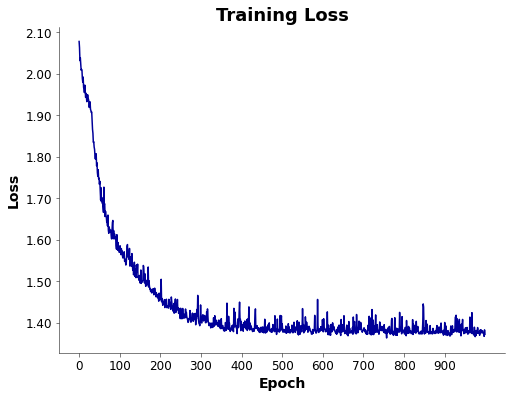

In [7]:
plot_line(loss, save_dir=save_dir)

Plot saved to /home/falcon/Desktop/T2P/src/experiments/synthetic_80_noise/2023-03-14T14_35_08.525968/Sparsity of z vector.png


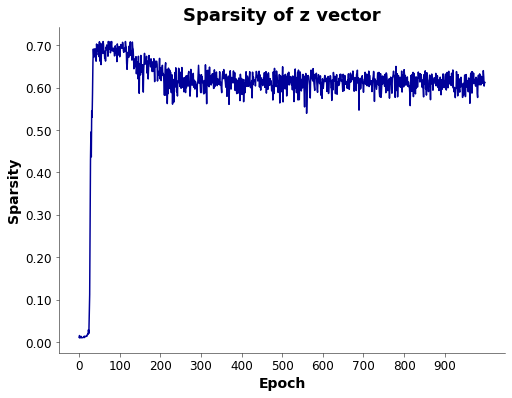

In [8]:
plot_line(sparsity, title='Sparsity of z vector', ylabel='Sparsity', save_dir=save_dir)

In [9]:
t2p.train(False)
patterns = t2p.decoder.weight[:,0].data.cpu().numpy()
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)
z_s = list()
alphas = list()
for i, x in enumerate(dataloader): 
    outputs = t2p(x)
    z = t2p.z.data.cpu().numpy()
    z_s.append(z[0,:,:,0,0])
    alphas.append(t2p.alpha.data.cpu().numpy()[0,:,:,0,0])

                
plot = Plot(dataset.get_input(),z_s,alphas,patterns,window_size)

Plot saved to /home/falcon/Desktop/T2P/src/experiments/synthetic_80_noise/2023-03-14T14_35_08.525968/patterns_analysis.png


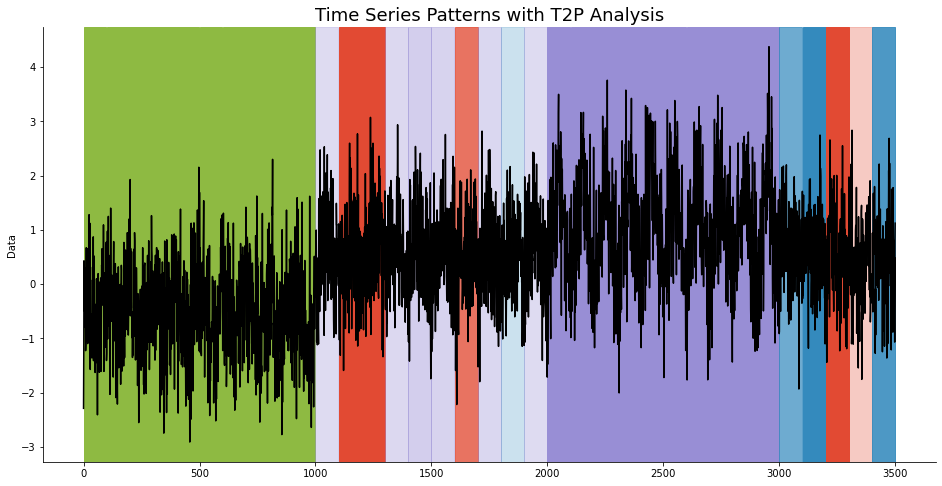

In [10]:
plot.plot_patterns_analysis(save_dir=save_dir)

Plot saved to /home/falcon/Desktop/T2P/src/experiments/synthetic_80_noise/2023-03-14T14_35_08.525968/patterns.png


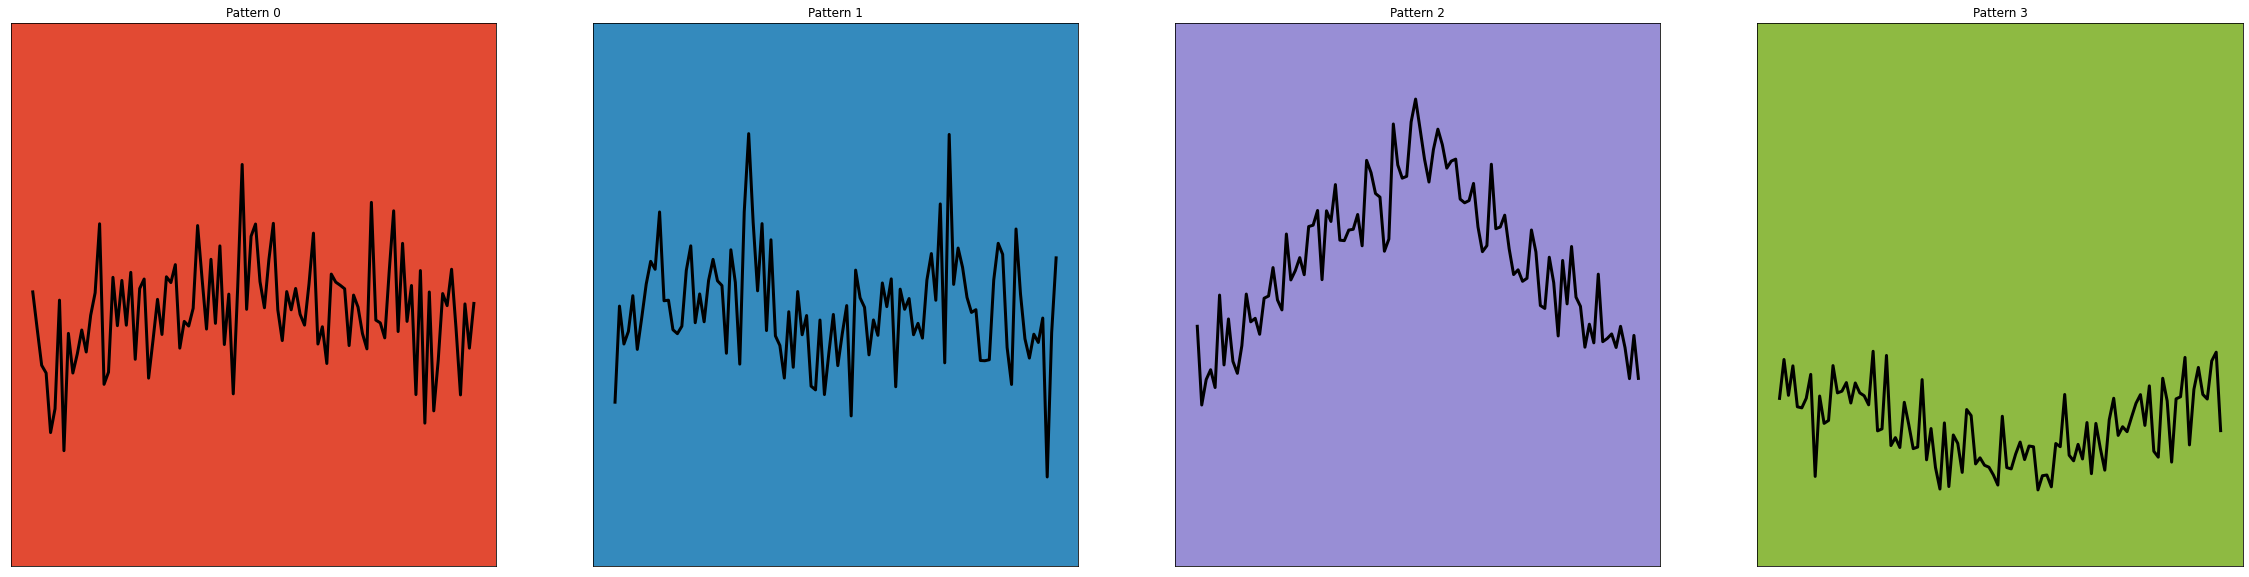

In [11]:
plot.plot_patterns(save_dir)